# Exploratory Data Analysis (EDA) on eCommerce Transactions Dataset

This notebook performs EDA on the provided eCommerce Transactions dataset consisting of Customers, Products, and Transactions.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets with error handling
try:
    customers = pd.read_csv('Customers.csv')
    products = pd.read_csv('Products.csv')
    transactions = pd.read_csv('Transactions.csv')
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit(1)

# Display the first few rows of each dataset
print("Customers:")
print(customers.head())
print("\nProducts:")
print(products.head())
print("\nTransactions:")
print(transactions.head())

Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024

In [58]:
# Check for missing values and data types
print("Customers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null

In [59]:
# Basic statistics
print("Customers Statistics:")
print(customers.describe())
print("\nProducts Statistics:")
print(products.describe())
print("\nTransactions Statistics:")
print(transactions.describe())

Customers Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


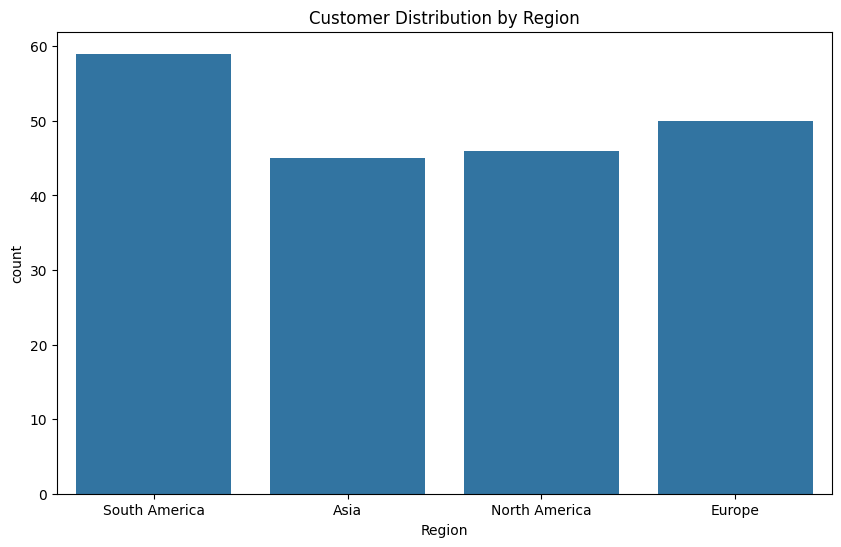

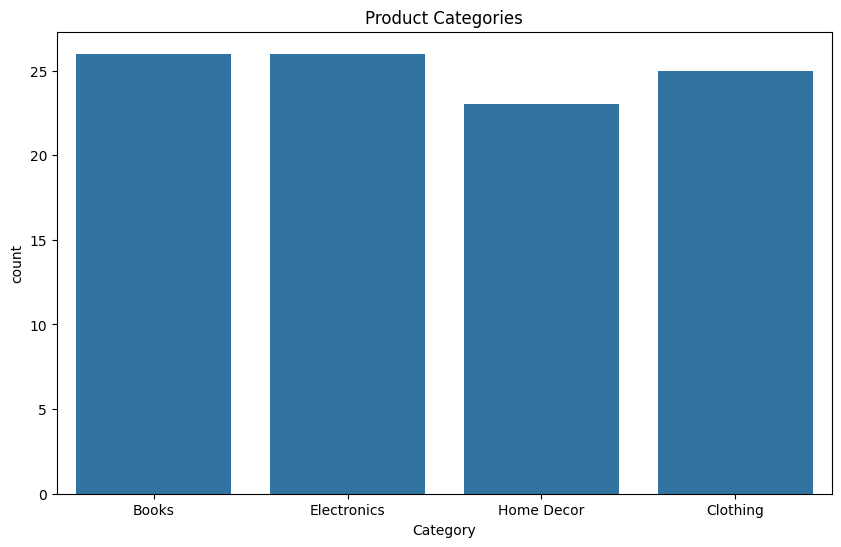

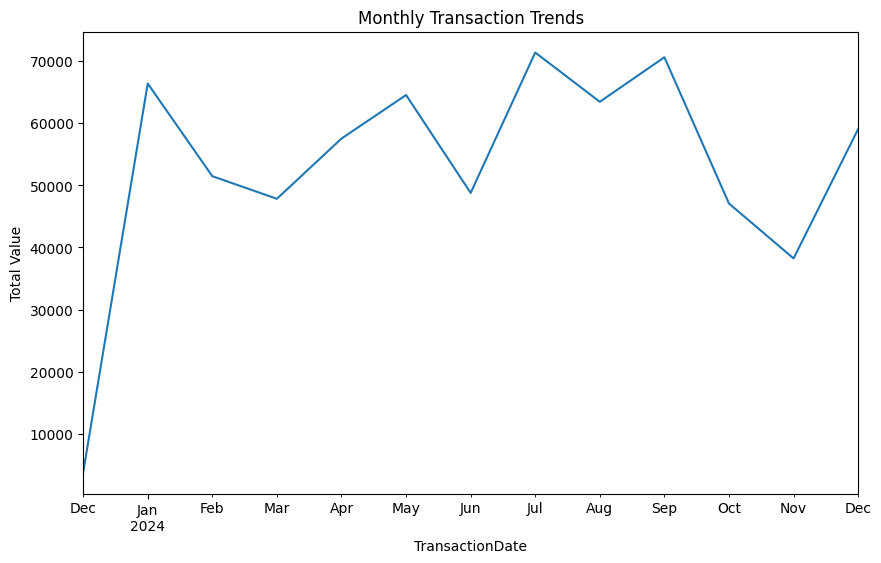

In [60]:
# Visualizations
# Customer distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

# Product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Product Categories')
plt.show()

# Transaction trends over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.set_index('TransactionDate', inplace=True)
transactions.resample('M').sum()['TotalValue'].plot(figsize=(10, 6))
plt.title('Monthly Transaction Trends')
plt.ylabel('Total Value')
plt.show()

In [51]:
#most bought products on the  eCommerce Busines
import pandas as pd

# 1. Summing up total quantity sold for each product ID in the Transactions dataset
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()

# 2. Sorting the results to find the product with the highest quantity sold
top_product = product_sales.sort_values('Quantity', ascending=False).head(5)

# 3. Merging with the Products dataset to get the product name and category
top_product_details = top_product.merge(products, on='ProductID', how='left')

# Display the most sold product details
top_product_details

,ProductID,Quantity,ProductName,Category,Price
0,P059,46,SoundWave Jeans,Clothing,303.20
1,P054,46,SoundWave Cookbook,Books,57.30
2,P029,45,TechPro Headphones,Electronics,433.64
3,P079,43,ActiveWear Rug,Home Decor,417.37
4,P061,43,HomeSense Desk Lamp,Home Decor,156.96


In [52]:
# top 5 most revenue genrated by products in eCommerce bussiness 
# Step 1: Add a "Revenue" column to the transactions dataset
# Revenue = Quantity * Price
transactions_with_revenue = transactions.merge(products[['ProductID', 'Price']], on='ProductID', how='left')
print(transactions_with_revenue.head())
transactions_with_revenue['Revenue'] = transactions_with_revenue.apply(lambda row: row['Quantity'] * row['Price_y'], axis=1)

# Step 2: Calculate total revenue generated by each product
product_revenue = transactions_with_revenue.groupby('ProductID')['Revenue'].sum().reset_index().rename(columns={'ProductID': 'ProductID'})

# Step 3: Merge with product details for better insights
product_revenue_details = product_revenue.merge(products, on='ProductID', how='left')

# Display the total revenue generated by each product
product_revenue_details = product_revenue_details.sort_values('Revenue', ascending=False)[['ProductID', 'Revenue', 'ProductName']]
print(product_revenue_details.head())

  TransactionID CustomerID ProductID  Quantity  TotalValue  Price_x  Price_y
0        T00001      C0199      P067         1      300.68   300.68   300.68
1        T00112      C0146      P067         1      300.68   300.68   300.68
2        T00166      C0127      P067         1      300.68   300.68   300.68
3        T00272      C0087      P067         2      601.36   300.68   300.68
4        T00363      C0070      P067         3      902.04   300.68   300.68
   ProductID   Revenue         ProductName
28      P029  19513.80  TechPro Headphones
78      P079  17946.91      ActiveWear Rug
47      P048  17905.20    TechPro Cookbook
19      P020  15060.92   ActiveWear Jacket
61      P062  14592.24     HomeSense Novel
